c:\Users\szb37\miniconda3\envs\adapt\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\szb37\miniconda3\envs\adapt\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\szb37\miniconda3\envs\adapt\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\szb37\miniconda3\envs\adapt\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

Optimal clusters (BIC): 3
Optimal clusters (AIC): 3


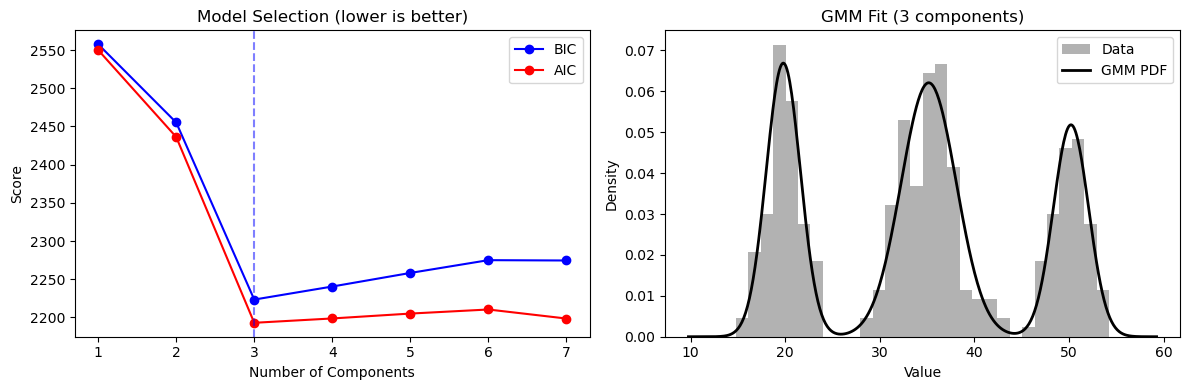


Cluster Parameters:
  Cluster 1: mean=35.17, std=2.92, weight=0.45
  Cluster 2: mean=50.21, std=1.87, weight=0.24
  Cluster 3: mean=19.79, std=1.81, weight=0.30


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate sample data with 3 clusters
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=20, scale=2, size=100),
    np.random.normal(loc=35, scale=3, size=150),
    np.random.normal(loc=50, scale=2, size=80)
]).reshape(-1, 1)

# Fit GMMs with different numbers of components and compare BIC/AIC
n_components_range = range(1, 8)
bic_scores = []
aic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data)
    bic_scores.append(gmm.bic(data))
    aic_scores.append(gmm.aic(data))

# Find optimal number of components
optimal_n_bic = n_components_range[np.argmin(bic_scores)]
optimal_n_aic = n_components_range[np.argmin(aic_scores)]
print(f"Optimal clusters (BIC): {optimal_n_bic}")
print(f"Optimal clusters (AIC): {optimal_n_aic}")

# Plot BIC/AIC scores
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(n_components_range, bic_scores, 'b-o', label='BIC')
axes[0].plot(n_components_range, aic_scores, 'r-o', label='AIC')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Selection (lower is better)')
axes[0].legend()
axes[0].axvline(x=optimal_n_bic, color='b', linestyle='--', alpha=0.5)

# Fit final model with optimal components
gmm_final = GaussianMixture(n_components=optimal_n_bic, random_state=42)
gmm_final.fit(data)
labels = gmm_final.predict(data)

# Plot data with cluster assignments
x_range = np.linspace(data.min() - 5, data.max() + 5, 500).reshape(-1, 1)
log_prob = gmm_final.score_samples(x_range)
pdf = np.exp(log_prob)

axes[1].hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Data')
axes[1].plot(x_range, pdf, 'k-', linewidth=2, label='GMM PDF')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title(f'GMM Fit ({optimal_n_bic} components)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print cluster parameters
print("\nCluster Parameters:")
for i in range(optimal_n_bic):
    print(f"  Cluster {i+1}: mean={gmm_final.means_[i][0]:.2f}, "
          f"std={np.sqrt(gmm_final.covariances_[i][0][0]):.2f}, "
          f"weight={gmm_final.weights_[i]:.2f}")